In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [105]:
file = 'C:/Users/mdbla/Documents/UW_VM_Capstone_2024/HTI/Preprocessed_Data/Pam194_ObjCell_clean.csv'

clean_data = pd.read_csv(file, sep = ',')

clean_data.head()

,Unnamed: 0,ImageNumber,ObjectNumber,Metadata_Metadata_Cytokine,Metadata_Metadata_Dose,Metadata_Plate,Metadata_Well,AreaShape_Area,AreaShape_Orientation,Granularity_1_CorrActin,...,Texture_Contrast_CorrMito_3_02_256,Texture_Contrast_CorrMito_3_03_256,Texture_Contrast_CorrNileRed_3_00_256,Texture_Contrast_CorrNileRed_3_01_256,Texture_Contrast_CorrNileRed_3_02_256,Texture_Contrast_CorrNileRed_3_03_256,Texture_Contrast_CorrWGA_3_00_256,Texture_Contrast_CorrWGA_3_01_256,Texture_Contrast_CorrWGA_3_02_256,Texture_Contrast_CorrWGA_3_03_256
0,2,1,3,IFNg,33,Plate 1,B10,0.085112,0.559548,0.862781,...,-0.124299,-0.139303,-0.274378,-0.337597,-0.306199,-0.263427,0.759206,0.786737,0.773574,0.850263
1,4,1,5,IFNg,33,Plate 1,B10,0.141638,1.542782,0.591617,...,-0.114598,-0.289217,-0.479973,-0.420706,-0.412925,-0.415949,0.036260,0.551452,0.882355,0.880883
2,7,1,8,IFNg,33,Plate 1,B10,0.402451,1.142915,1.220909,...,-0.391648,-0.409807,-0.452504,-0.448144,-0.468040,-0.450740,-0.067982,-0.026755,-0.175691,-0.098676
3,12,1,13,IFNg,33,Plate 1,B10,0.461953,0.126585,-0.437595,...,-0.639159,-0.589324,-0.477470,-0.496174,-0.540795,-0.483189,-0.506243,-0.559539,-0.645512,-0.522595
4,13,1,14,IFNg,33,Plate 1,B10,0.562113,-0.135726,1.164797,...,-0.340173,-0.161268,-0.311026,-0.388504,-0.320758,-0.297486,0.223399,0.014643,-0.091914,0.009626


In [106]:
# running some basic stats on the features

features = clean_data.iloc[:,7:]

features.describe().T

,count,mean,std,min,25%,50%,75%,max
AreaShape_Area,28282.0,0.011119,0.571509,-0.777656,-0.452383,-0.135043,0.365759,1.579584
AreaShape_Orientation,28282.0,0.002471,0.958266,-1.948990,-0.678724,0.005326,0.681628,1.944390
Granularity_1_CorrActin,28282.0,0.098623,0.831821,-2.408030,-0.490002,0.038344,0.635074,2.430528
Granularity_1_CorrDNA2,28282.0,-0.064660,0.829391,-2.594488,-0.602748,0.076110,0.557603,1.858284
Granularity_1_CorrGolgi,28282.0,-0.069585,0.785899,-2.502091,-0.619009,-0.100185,0.439290,2.437356
...,...,...,...,...,...,...,...,...
Texture_Contrast_CorrNileRed_3_03_256,28282.0,-0.299827,0.174238,-0.526536,-0.422060,-0.348681,-0.232859,0.600643
Texture_Contrast_CorrWGA_3_00_256,28282.0,-0.337401,0.265813,-0.719035,-0.527461,-0.406947,-0.223897,0.938743
Texture_Contrast_CorrWGA_3_01_256,28282.0,-0.333868,0.271311,-0.711801,-0.527482,-0.408848,-0.219225,0.942868
Texture_Contrast_CorrWGA_3_02_256,28282.0,-0.332172,0.283746,-0.739843,-0.536812,-0.406767,-0.205070,1.004348


# Statistical Analyses

#### These analyses should be conducted with a smaller set of features post-PCA 

In [107]:
cytokine_df = clean_data.iloc[:,np.r_[3:7,7:103]] # This data only contains our cytokine variable and featrues

cytokine_df.head()

,Metadata_Metadata_Cytokine,Metadata_Metadata_Dose,Metadata_Plate,Metadata_Well,AreaShape_Area,AreaShape_Orientation,Granularity_1_CorrActin,Granularity_1_CorrDNA2,Granularity_1_CorrGolgi,Granularity_1_CorrMito,...,Texture_Contrast_CorrMito_3_00_256,Texture_Contrast_CorrMito_3_01_256,Texture_Contrast_CorrMito_3_02_256,Texture_Contrast_CorrMito_3_03_256,Texture_Contrast_CorrNileRed_3_00_256,Texture_Contrast_CorrNileRed_3_01_256,Texture_Contrast_CorrNileRed_3_02_256,Texture_Contrast_CorrNileRed_3_03_256,Texture_Contrast_CorrWGA_3_00_256,Texture_Contrast_CorrWGA_3_01_256
0,IFNg,33,Plate 1,B10,0.085112,0.559548,0.862781,-0.721879,-0.050519,-0.965729,...,-0.204361,-0.096921,-0.124299,-0.139303,-0.274378,-0.337597,-0.306199,-0.263427,0.759206,0.786737
1,IFNg,33,Plate 1,B10,0.141638,1.542782,0.591617,-1.215667,-0.285668,-0.337819,...,-0.389808,-0.022072,-0.114598,-0.289217,-0.479973,-0.420706,-0.412925,-0.415949,0.036260,0.551452
2,IFNg,33,Plate 1,B10,0.402451,1.142915,1.220909,-0.774074,-0.544809,-0.649899,...,-0.519049,-0.453334,-0.391648,-0.409807,-0.452504,-0.448144,-0.468040,-0.450740,-0.067982,-0.026755
3,IFNg,33,Plate 1,B10,0.461953,0.126585,-0.437595,0.953772,0.359530,0.458634,...,-0.547096,-0.621335,-0.639159,-0.589324,-0.477470,-0.496174,-0.540795,-0.483189,-0.506243,-0.559539
4,IFNg,33,Plate 1,B10,0.562113,-0.135726,1.164797,-0.796497,0.058967,-1.352038,...,-0.341820,-0.473407,-0.340173,-0.161268,-0.311026,-0.388504,-0.320758,-0.297486,0.223399,0.014643


### Group Difference: Average Values for Cytokines by Dosage (not including 'untr' or 'untr-50')

##### Method for Hypthesis testing: ANOVA & pairwise t-test

#### The following analysis consists of one-way ANOVA, which tests if there is a significant difference between any of the features for each cytokine

#### H0: M(B10) = M(C13) = ...

In [108]:
# supplementing the above analysis with one-way ANOVA
from scipy.stats import f_oneway

cytokine_doses = cytokine_df.drop(['Metadata_Plate', 'Metadata_Well'], axis=1)
cytokines = cytokine_doses['Metadata_Metadata_Cytokine'].unique().tolist()

def run_ANOVA_dosage(df, cytokine):
    final_df = pd.DataFrame(columns=['Cytokine', 'Feature', 'F-stat', 'P-value'])
    features = df.columns[2:].tolist()
    x=0
    for feature in features:
        sub_df = df[['Metadata_Metadata_Dose', feature]]
        grps = [d[feature] for _, d in sub_df.groupby('Metadata_Metadata_Dose')]
        F, p = f_oneway(*grps)
        final_df.loc[x] = [cytokine, feature, F, p]
        x = x+1
    return final_df
    
anova_df = pd.DataFrame()
for cytokine in cytokines:
    if('untr' not in cytokine):
        sub_cyto_df = cytokine_doses[cytokine_doses['Metadata_Metadata_Cytokine'] == cytokine]
        cyto = str(sub_cyto_df['Metadata_Metadata_Cytokine'].tolist()[0])
        df = run_ANOVA_dosage(sub_cyto_df,cyto)
        anova_df = pd.concat([anova_df,df])

anova_df

,Cytokine,Feature,F-stat,P-value
0,IFNg,AreaShape_Area,6.542318,1.464748e-03
1,IFNg,AreaShape_Orientation,0.079396,9.236768e-01
2,IFNg,Granularity_1_CorrActin,60.799562,1.542396e-26
3,IFNg,Granularity_1_CorrDNA2,2.442973,8.709955e-02
4,IFNg,Granularity_1_CorrGolgi,2.008549,1.343894e-01
...,...,...,...,...
91,IL26,Texture_Contrast_CorrNileRed_3_01_256,11.259787,1.362588e-05
92,IL26,Texture_Contrast_CorrNileRed_3_02_256,11.613384,9.601792e-06
93,IL26,Texture_Contrast_CorrNileRed_3_03_256,10.058306,4.479608e-05
94,IL26,Texture_Contrast_CorrWGA_3_00_256,39.042979,2.151920e-17


##### The following supplementary analysis is a pairwise t-test for each feature to see which pair of cytokine doses are significantly different from one another 

##### H0: For each of our selected features, dosage does not contribute to any significant difference in the averages for our cytokines

In [109]:
# Below is a funciton that will run groupwise t-test for each cytokine across the dosage. 

# As of right now, this is a little messy. Once we go over this table and agree that we should use it, I
# can improve the implementation of this code. 

from scipy import stats
import statsmodels.stats.multicomp as mc # this module will be used to compare the mean values for 

def run_multicomp_dosage(df, cytokine):
    final_df = pd.DataFrame()
    features = df.columns[2:].tolist()
    for feature in features:
        comp1 = mc.MultiComparison(df[feature], df['Metadata_Metadata_Dose'])
        tbl, a1, a2 = comp1.allpairtest(stats.ttest_ind, method= "bonf")
        tmp_comp = pd.DataFrame(a2)
        tmp_comp.insert(0,'Features', feature)
        final_df = pd.concat([final_df, tmp_comp])
    final_df.insert(0,'Cytokine', cytokine)
    return final_df
    
        
comp_df = pd.DataFrame()
for cytokine in cytokines:
    if('untr' not in cytokine):
        sub_cyto_df = cytokine_doses[cytokine_doses['Metadata_Metadata_Cytokine'] == cytokine]
        cyto = str(sub_cyto_df['Metadata_Metadata_Cytokine'].tolist()[0])
        df = run_multicomp_dosage(sub_cyto_df,cyto)
        comp_df = pd.concat([comp_df,df])

comp_df
# we can shorten this dataframe by selecting corrected p-values <0.05 (or whatever threshold we set)
# comp_df[comp_df['pval_corr'] < 0.05]

,Cytokine,Features,group1,group2,stat,pval,pval_corr,reject
0,IFNg,AreaShape_Area,11,33,-1.1985,0.2309,0.6928,False
1,IFNg,AreaShape_Area,11,100,1.8820,0.0600,0.1800,False
2,IFNg,AreaShape_Area,33,100,3.5655,0.0004,0.0011,True
0,IFNg,AreaShape_Orientation,11,33,-0.3751,0.7077,1.0000,False
1,IFNg,AreaShape_Orientation,11,100,-0.1486,0.8819,1.0000,False
...,...,...,...,...,...,...,...,...
1,IL26,Texture_Contrast_CorrWGA_3_00_256,11,100,-0.7715,0.4405,1.0000,False
2,IL26,Texture_Contrast_CorrWGA_3_00_256,33,100,-8.6445,0.0000,0.0000,True
0,IL26,Texture_Contrast_CorrWGA_3_01_256,11,33,7.1043,0.0000,0.0000,True
1,IL26,Texture_Contrast_CorrWGA_3_01_256,11,100,-0.0482,0.9616,1.0000,False


### Group Difference: Average Values for Cytokines by Wells

##### H0: For each of our selected features, our wells should not contribute to any significant difference in the averages for our cytokines

#### I.E. if any significant differences are detected, we shoud capture this in some way as it suggests that the mean differences that we observe may be contributed to contaminated wells or some external factor in the lab

##### Method for Hypthesis testing: ANOVA & pairwise t-test

In [110]:
# Below is a funciton that will run groupwise t-test for each cytokine across the dosage. 

# As of right now, this is a little messy. Once we go over this table and agree that we should use it, I
# can improve the implementation of this code. 
cytokine_wells = cytokine_df.drop(['Metadata_Metadata_Dose', 'Metadata_Plate'], axis=1)
cytokines = cytokine_wells['Metadata_Metadata_Cytokine'].unique().tolist()

def run_ANOVA_wells(df, cytokine):
    final_df = pd.DataFrame(columns=['Cytokine', 'Feature', 'F-stat', 'P-value'])
    features = df.columns[2:].tolist()
    x=0
    for feature in features:
        sub_df = df[['Metadata_Well', feature]]
        grps = [d[feature] for _, d in sub_df.groupby('Metadata_Well')]
        F, p = f_oneway(*grps)
        final_df.loc[x] = [cytokine, feature, F, p]
        x = x+1
    return final_df
    
anova_df = pd.DataFrame()
for cytokine in cytokines:
    if('untr' not in cytokine):
        sub_cyto_df = cytokine_wells[cytokine_wells['Metadata_Metadata_Cytokine'] == cytokine]
        cyto = str(sub_cyto_df['Metadata_Metadata_Cytokine'].tolist()[0])
        df = run_ANOVA_wells(sub_cyto_df,cyto)
        anova_df = pd.concat([anova_df,df])

anova_df

,Cytokine,Feature,F-stat,P-value
0,IFNg,AreaShape_Area,3.791971,2.004223e-03
1,IFNg,AreaShape_Orientation,0.571761,7.217313e-01
2,IFNg,Granularity_1_CorrActin,34.038878,8.527372e-34
3,IFNg,Granularity_1_CorrDNA2,1.829872,1.036596e-01
4,IFNg,Granularity_1_CorrGolgi,2.055024,6.817117e-02
...,...,...,...,...
91,IL26,Texture_Contrast_CorrNileRed_3_01_256,5.308908,7.443098e-05
92,IL26,Texture_Contrast_CorrNileRed_3_02_256,5.100886,1.178120e-04
93,IL26,Texture_Contrast_CorrNileRed_3_03_256,4.281616,7.045301e-04
94,IL26,Texture_Contrast_CorrWGA_3_00_256,23.239935,7.995329e-23


##### The following supplementary analysis is a pairwise t-test for each feature to see which pair of wells have significantly different means from one another 

##### H0: For each of our selected features, the wells does not contribute to any significant difference in the average feature mean for our cytokines

In [111]:
# Below is a funciton that will run pairwise t-test for each cytokine across the dosage. 

def run_multicomp_wells(df, cytokine):
    final_df = pd.DataFrame()
    features = df.columns[2:].tolist()
    for feature in features:
        comp1 = mc.MultiComparison(df[feature], df['Metadata_Well'])
        tbl, a1, a2 = comp1.allpairtest(stats.ttest_ind, method= "bonf")
        tmp_comp = pd.DataFrame(a2)
        tmp_comp.insert(0,'Features', feature)
        final_df = pd.concat([final_df, tmp_comp])
    final_df.insert(0,'Cytokine', cytokine)
    return final_df
    
        
comp_df = pd.DataFrame()
for cytokine in cytokines:
    sub_cyto_df = cytokine_wells[cytokine_wells['Metadata_Metadata_Cytokine'] == cytokine]
    cyto = str(sub_cyto_df['Metadata_Metadata_Cytokine'].tolist()[0])
    df = run_multicomp_wells(sub_cyto_df,cyto)
    comp_df = pd.concat([comp_df,df])

comp_df
# we can shorten this dataframe by selecting corrected p-values <0.05 (or whatever threshold we set)
# comp_df[comp_df['pval_corr'] < 0.05]

,Cytokine,Features,group1,group2,stat,pval,pval_corr,reject
0,IFNg,AreaShape_Area,B10,B11,0.3984,0.6904,1.0000,False
1,IFNg,AreaShape_Area,B10,B9,2.5619,0.0105,0.1579,False
2,IFNg,AreaShape_Area,B10,C10,-1.4350,0.1516,1.0000,False
3,IFNg,AreaShape_Area,B10,C11,0.0067,0.9947,1.0000,False
4,IFNg,AreaShape_Area,B10,C9,0.3388,0.7349,1.0000,False
...,...,...,...,...,...,...,...,...
10,IL26,Texture_Contrast_CorrWGA_3_01_256,F4,G3,7.5376,0.0000,0.0000,True
11,IL26,Texture_Contrast_CorrWGA_3_01_256,F4,G4,-0.1386,0.8898,1.0000,False
12,IL26,Texture_Contrast_CorrWGA_3_01_256,G2,G3,9.7183,0.0000,0.0000,True
13,IL26,Texture_Contrast_CorrWGA_3_01_256,G2,G4,1.3324,0.1831,1.0000,False


### Group Difference: Average Values for Untreated Cells by Plate

##### H0: For each of our selected features, the plates should not contribute to any significant difference in the averages for our untreated cells

#### Reminder: cytokines vary from plate to plate, but each plate is treated with the same untr and untr-50 cells

#### Similar to the analysis above, if any significant differences are detected, we shoud capture this in some way as it suggests that the mean differences that we observe may be contributed to contaminated plates or some external factor in the lab

##### Method for Hypthesis testing: ANOVA & pairwise t-test

#### QUESTION FOR SPONSORS: It seems only untr has feature measurements for multiple plates. Is this the case? Is untr-50 analyzed on separate plates as well?

In [112]:
untr_plates = cytokine_df.drop(['Metadata_Metadata_Dose', 'Metadata_Well'], axis=1)
untr_plates = untr_plates.query('Metadata_Metadata_Cytokine.str.startswith("untr").values')

untreated = untr_plates['Metadata_Metadata_Cytokine'].unique().tolist()

def run_ANOVA_plates(df, cytokine):
    final_df = pd.DataFrame(columns=['Cytokine', 'Feature', 'F-stat', 'P-value'])
    features = df.columns[2:].tolist()
    x=0
    for feature in features:
        sub_df = df[['Metadata_Plate', feature]]
        grps = [d[feature] for _, d in sub_df.groupby('Metadata_Plate')]
        F, p = f_oneway(*grps)
        final_df.loc[x] = [cytokine, feature, F, p]
        x = x+1
    return final_df
    
anova_df = pd.DataFrame()
for cytokine in untreated:
    sub_cyto_df = untr_plates[untr_plates['Metadata_Metadata_Cytokine'] == cytokine]
    cyto = str(sub_cyto_df['Metadata_Metadata_Cytokine'].tolist()[0])
    if(len(sub_cyto_df['Metadata_Plate'].unique()) > 1):
        df = run_ANOVA_plates(sub_cyto_df,cyto)
        anova_df = pd.concat([anova_df,df])

anova_df

,Cytokine,Feature,F-stat,P-value
0,untr,AreaShape_Area,3.280197,3.797282e-02
1,untr,AreaShape_Orientation,0.029848,9.705934e-01
2,untr,Granularity_1_CorrActin,28.374943,9.355828e-13
3,untr,Granularity_1_CorrDNA2,37.594990,1.527060e-16
4,untr,Granularity_1_CorrGolgi,34.123993,4.007519e-15
...,...,...,...,...
91,untr,Texture_Contrast_CorrNileRed_3_01_256,324.114122,2.221806e-112
92,untr,Texture_Contrast_CorrNileRed_3_02_256,265.404409,1.638328e-95
93,untr,Texture_Contrast_CorrNileRed_3_03_256,342.185247,2.375927e-117
94,untr,Texture_Contrast_CorrWGA_3_00_256,51.892667,2.643258e-22


##### The following supplementary analysis is a pairwise t-test for each feature to see which pair of plates have significantly different means among our untreated cells fore each features

##### H0: For each of our selected features, the plates does not contribute to any significant difference in the average feature mean for our untreated cells

In [113]:
# Below is a funciton that will run groupwise t-test for each cytokine across the dosage. 

# As of right now, this is a little messy. Once we go over this table and agree that we should use it, I
# can improve the implementation of this code. 

def run_multicomp_plates(df, cytokine):
    final_df = pd.DataFrame()
    features = df.columns[2:].tolist()
    for feature in features:
        comp1 = mc.MultiComparison(df[feature], df['Metadata_Plate'])
        tbl, a1, a2 = comp1.allpairtest(stats.ttest_ind, method= "bonf")
        tmp_comp = pd.DataFrame(a2)
        tmp_comp.insert(0,'Features', feature)
        final_df = pd.concat([final_df, tmp_comp])
    final_df.insert(0,'Cytokine', cytokine)
    return final_df
    
        
comp_df = pd.DataFrame()
for cytokine in untreated:
    #print(cytokine)
    sub_cyto_df = untr_plates[untr_plates['Metadata_Metadata_Cytokine'] == cytokine]
    cyto = str(sub_cyto_df['Metadata_Metadata_Cytokine'].tolist()[0])
    if(len(sub_cyto_df['Metadata_Plate'].unique()) > 1):
        df = run_multicomp_plates(sub_cyto_df,cyto)
        comp_df = pd.concat([comp_df,df])

comp_df
# we can shorten this dataframe by selecting corrected p-values <0.05 (or whatever threshold we set)
# comp_df[comp_df['pval_corr'] < 0.05]

,Cytokine,Features,group1,group2,stat,pval,pval_corr,reject
0,untr,AreaShape_Area,Plate 1,Plate 2,-2.1472,0.0320,0.0960,False
1,untr,AreaShape_Area,Plate 1,Plate 3,0.9173,0.3593,1.0000,False
2,untr,AreaShape_Area,Plate 2,Plate 3,2.2320,0.0262,0.0785,False
0,untr,AreaShape_Orientation,Plate 1,Plate 2,-0.2161,0.8290,1.0000,False
1,untr,AreaShape_Orientation,Plate 1,Plate 3,0.0614,0.9511,1.0000,False
...,...,...,...,...,...,...,...,...
1,untr,Texture_Contrast_CorrWGA_3_00_256,Plate 1,Plate 3,9.8217,0.0000,0.0000,True
2,untr,Texture_Contrast_CorrWGA_3_00_256,Plate 2,Plate 3,9.3423,0.0000,0.0000,True
0,untr,Texture_Contrast_CorrWGA_3_01_256,Plate 1,Plate 2,3.8763,0.0001,0.0003,True
1,untr,Texture_Contrast_CorrWGA_3_01_256,Plate 1,Plate 3,9.7784,0.0000,0.0000,True


### Potential Plot: Cytokine mean differences by dose

#### This is to showcase a example of a visualization we can include onto our dashboards. Ideally, this analysis should be conducted on our reduced feature dataset post-PCA

In [114]:
# Here's a function that we can use to generate our plots

# This has a time complexity of O(n^2), but since the # of cytokines is at most 12 and the # of feature is at most ~200.
# does it matter?

#def create_mean_diff_plots(df):
    #for cytokine in df['Metadata_Metadata_Cytokine'].unique():
        #for feature in df.colmuns[2:]: # grabs only the feature columns
           # subs
        

# Below is an example of the type of visualizations that the above function produces. 
cytokines = cytokine_df['Metadata_Metadata_Cytokine'].unique().tolist()

sub_cyto_df = cytokine_df[cytokine_df['Metadata_Metadata_Cytokine'] == 'IL9']

sub_cyto_df.head()

,Metadata_Metadata_Cytokine,Metadata_Metadata_Dose,Metadata_Plate,Metadata_Well,AreaShape_Area,AreaShape_Orientation,Granularity_1_CorrActin,Granularity_1_CorrDNA2,Granularity_1_CorrGolgi,Granularity_1_CorrMito,...,Texture_Contrast_CorrMito_3_00_256,Texture_Contrast_CorrMito_3_01_256,Texture_Contrast_CorrMito_3_02_256,Texture_Contrast_CorrMito_3_03_256,Texture_Contrast_CorrNileRed_3_00_256,Texture_Contrast_CorrNileRed_3_01_256,Texture_Contrast_CorrNileRed_3_02_256,Texture_Contrast_CorrNileRed_3_03_256,Texture_Contrast_CorrWGA_3_00_256,Texture_Contrast_CorrWGA_3_01_256
11434,IL9,33,Plate 2,B10,0.786234,-0.921241,0.311094,-0.206389,0.013432,-0.922530,...,-0.573245,-0.496051,-0.596690,-0.677824,-0.423896,-0.374765,-0.439776,-0.477131,-0.550989,-0.502574
11435,IL9,33,Plate 2,B10,-0.064633,0.788906,-0.956309,-1.658562,-1.113579,-0.787475,...,-0.230340,-0.481172,-0.324806,-0.175415,-0.214536,-0.378657,-0.272277,-0.193975,-0.380994,-0.541533
11436,IL9,33,Plate 2,B10,-0.238178,0.569915,0.985971,0.665115,1.175732,0.479334,...,-0.616708,-0.588301,-0.633310,-0.694455,-0.401842,-0.369858,-0.405085,-0.443951,-0.589555,-0.519247
11437,IL9,33,Plate 2,B10,-0.609069,-0.072483,0.276015,0.593711,0.692030,0.285813,...,0.181252,-0.112345,-0.092061,0.318639,0.217305,-0.052484,-0.106435,0.051039,-0.080505,-0.386392
11438,IL9,33,Plate 2,B10,-0.691379,-0.107070,0.504564,0.792615,0.722898,0.511232,...,-0.293050,-0.386610,-0.315306,-0.280557,-0.237817,-0.284400,-0.285999,-0.241450,-0.568022,-0.587237


In [115]:
cytokine_df.columns[2:]

Index(['Metadata_Plate', 'Metadata_Well', 'AreaShape_Area',
       'AreaShape_Orientation', 'Granularity_1_CorrActin',
       'Granularity_1_CorrDNA2', 'Granularity_1_CorrGolgi',
       'Granularity_1_CorrMito', 'Granularity_1_CorrNileRed',
       'Granularity_1_CorrWGA', 'Granularity_2_CorrActin',
       'Granularity_2_CorrDNA2', 'Granularity_2_CorrGolgi',
       'Granularity_2_CorrMito', 'Granularity_2_CorrNileRed',
       'Granularity_2_CorrWGA', 'Granularity_3_CorrActin',
       'Granularity_3_CorrDNA2', 'Granularity_3_CorrGolgi',
       'Granularity_3_CorrMito', 'Granularity_3_CorrNileRed',
       'Granularity_3_CorrWGA', 'Granularity_4_CorrActin',
       'Granularity_4_CorrDNA2', 'Granularity_4_CorrGolgi',
       'Granularity_4_CorrMito', 'Granularity_4_CorrNileRed',
       'Granularity_4_CorrWGA', 'Intensity_MedianIntensity_CorrActin',
       'Intensity_MedianIntensity_CorrDNA2',
       'Intensity_MedianIntensity_CorrGolgi',
       'Intensity_MedianIntensity_CorrMito',
       'I

C:\Users\mdbla\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0, 0.5, 'Change in Mean Value')

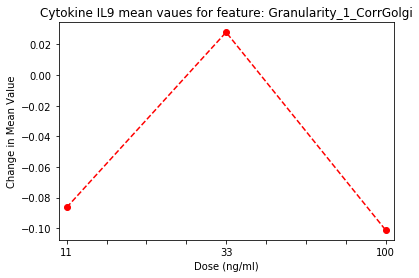

In [116]:
# First, we'll select for a feature. Ideally, this feature is one that is included in our reduced dataset

cyto_v_feature = sub_cyto_df[["Metadata_Metadata_Cytokine","Metadata_Metadata_Dose","Granularity_1_CorrGolgi"]]

# Get each dose (which can either total to 3 or 4 doses, depending on the cytokine), sort them, and convert them to 
# categorical labels
doses = cyto_v_feature['Metadata_Metadata_Dose'].unique().tolist()
doses.sort()
doses = [str(x) for x in doses]

# Converting the dose column into a factor column, rather than numeric
cyto_v_feature['Metadata_Metadata_Dose'] = cyto_v_feature['Metadata_Metadata_Dose'].astype(str)

# Then, we'll we'll group by dosage
dose_groups = cyto_v_feature.groupby('Metadata_Metadata_Dose')

# Now plotting
plt = dose_groups.Granularity_1_CorrGolgi.mean().loc[['11', '33', '100']].plot(linestyle='--', marker='o', xlim=(-0.05,2.05),
                                                                               color='r', label='line with marker',
                                                                              title="Cytokine IL9 mean vaues for feature: Granularity_1_CorrGolgi")
plt.set_xlabel("Dose (ng/ml)")
plt.set_ylabel("Change in Mean Value")

In [117]:
print(doses)

['11', '33', '100']


In [119]:
cyto_v_feature = sub_cyto_df[["Metadata_Metadata_Cytokine","Metadata_Metadata_Dose","Granularity_1_CorrGolgi"]]

#plt.plot('Metadata_Metadata_Dose', avg('Granularity_1_CorrGolgi'), data=cyto_v_feature)

In [121]:
#df dose_groups.Granularity_1_CorrGolgi.mean().loc[['11', '33', '100']]